In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/Projects/Youtube

Mounted at /content/drive/
/content/drive/MyDrive/Projects/Youtube


In [ ]:
!ls

Data  models  pneumonia_classification


In [ ]:
# !unzip Data/rsna-pneumonia-detection-challenge.zip -d /content/

In [ ]:
# !pip install pydicom

In [ ]:
from pathlib import Path
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
labels_csv = pd.read_csv("/content/stage_2_train_labels.csv")

labels_csv.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
labels_csv["patientId"].value_counts()

patientId
3239951b-6211-4290-b237-3d9ad17176db    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
                                       ..
7233ab9f-7fa6-4b5b-acdc-1c93bf945db5    1
722cca4a-f542-47ba-be14-29238c1124e1    1
722ad9c3-919a-4c08-bb67-cafd603ba754    1
7228bf11-3ce7-47f5-bee3-d36325df1dc8    1
943b27f1-ba1c-415b-b738-7b52aefa445b    1
Name: count, Length: 26684, dtype: int64

In [ ]:
labels_csv = labels_csv.drop_duplicates("patientId")

In [ ]:
labels_csv["patientId"].value_counts()

patientId
0004cfab-14fd-4e49-80ba-63a80b6bddd6    1
bbd92872-acee-4b27-98b7-07faa4e90919    1
bab85bc8-80d9-4781-b5f7-2d143e56625e    1
bab71d24-89ad-4ae5-bbc1-4d0b6fefcc52    1
baac5ed4-b582-4c80-bd2d-acb97c52806e    1
                                       ..
6cae5af4-d7b9-4a62-ae00-51c10748e672    1
6cab36ad-98de-4ed3-b6a8-ae4621be9044    1
6caa9d84-36c3-48b5-9170-adb736c53e5c    1
6ca9f96b-f164-4022-8c4d-28eed6214c4f    1
c1f7889a-9ea9-4acb-b64c-b737c929599a    1
Name: count, Length: 26684, dtype: int64

In [ ]:
root = Path("/content/stage_2_train_images")

In [ ]:
file_name = labels_csv["patientId"][0]

file_path = root.joinpath(file_name).with_suffix(".dcm")
file_path

PosixPath('/content/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm')

In [ ]:
dcm_file = pydicom.read_file(file_path)
dcm_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

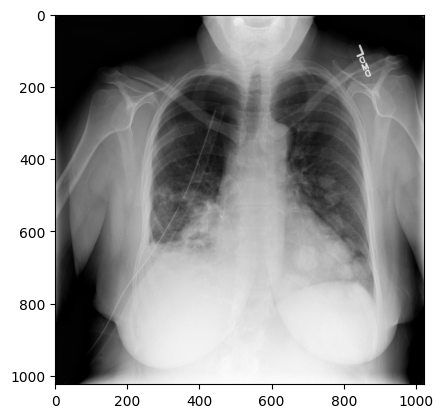

In [ ]:
plt.imshow(dcm_file.pixel_array, cmap="gray")

In [ ]:
labels_csv["Target"].value_counts()

Target
0    20672
1     6012
Name: count, dtype: int64

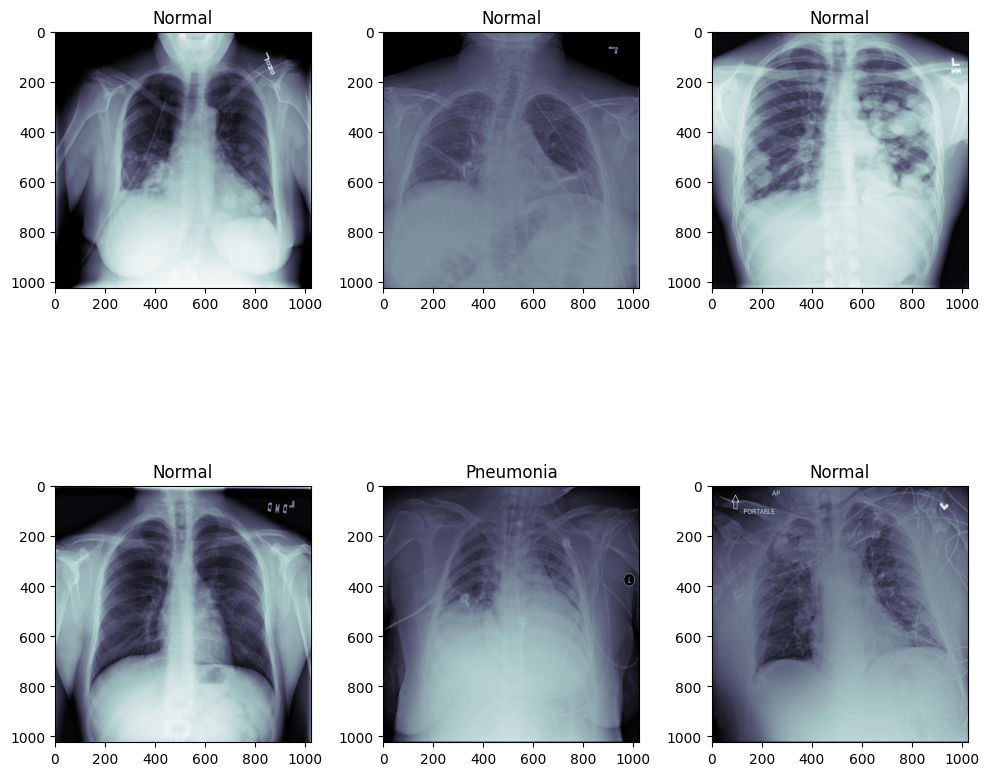

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(10,10))

count = 0
for i in range(2):
    for j in range(3):
        patient_id = labels_csv["patientId"].iloc[count]
        target = labels_csv["Target"].iloc[count]

        file_path = root.joinpath(patient_id).with_suffix(".dcm")

        dicom_file = pydicom.read_file(file_path).pixel_array
        label = "Pneumonia" if target == 1 else "Normal"

        axis[i][j].imshow(dicom_file, cmap='bone')
        axis[i][j].set_title(label)


        count += 1

plt.tight_layout()
plt.show()

In [ ]:
output_folder = Path("/content/Preprocessed")

In [ ]:
for index, row in tqdm(labels_csv.iterrows()):
  file_name = row["patientId"]
  target = row["Target"]

  label = "Pneumonia" if target == 1 else "Normal"

  file_path = root.joinpath(file_name).with_suffix(".dcm")

  dicom_arr = pydicom.read_file(file_path).pixel_array / 255

  image_resized = cv2.resize(dicom_arr, (224, 224))

  output_path_class = output_folder/label
  output_path_class.mkdir(parents=True, exist_ok = True)
  np.save(output_path_class/file_name, image_resized)

26684it [05:49, 76.27it/s]


In [ ]:
import os

len(os.listdir("/content/Preprocessed/Pneumonia")), len(os.listdir("/content/Preprocessed/Normal"))

(6012, 20672)